# Neural Networks

Neural Network is a computational learning system that uses a network of functions to understand and translate a data input of one form into a desired output, usually in another form. The concept of the artificial neural network was inspired by human biology and the way neurons of the human brain function together to understand inputs from human senses. 

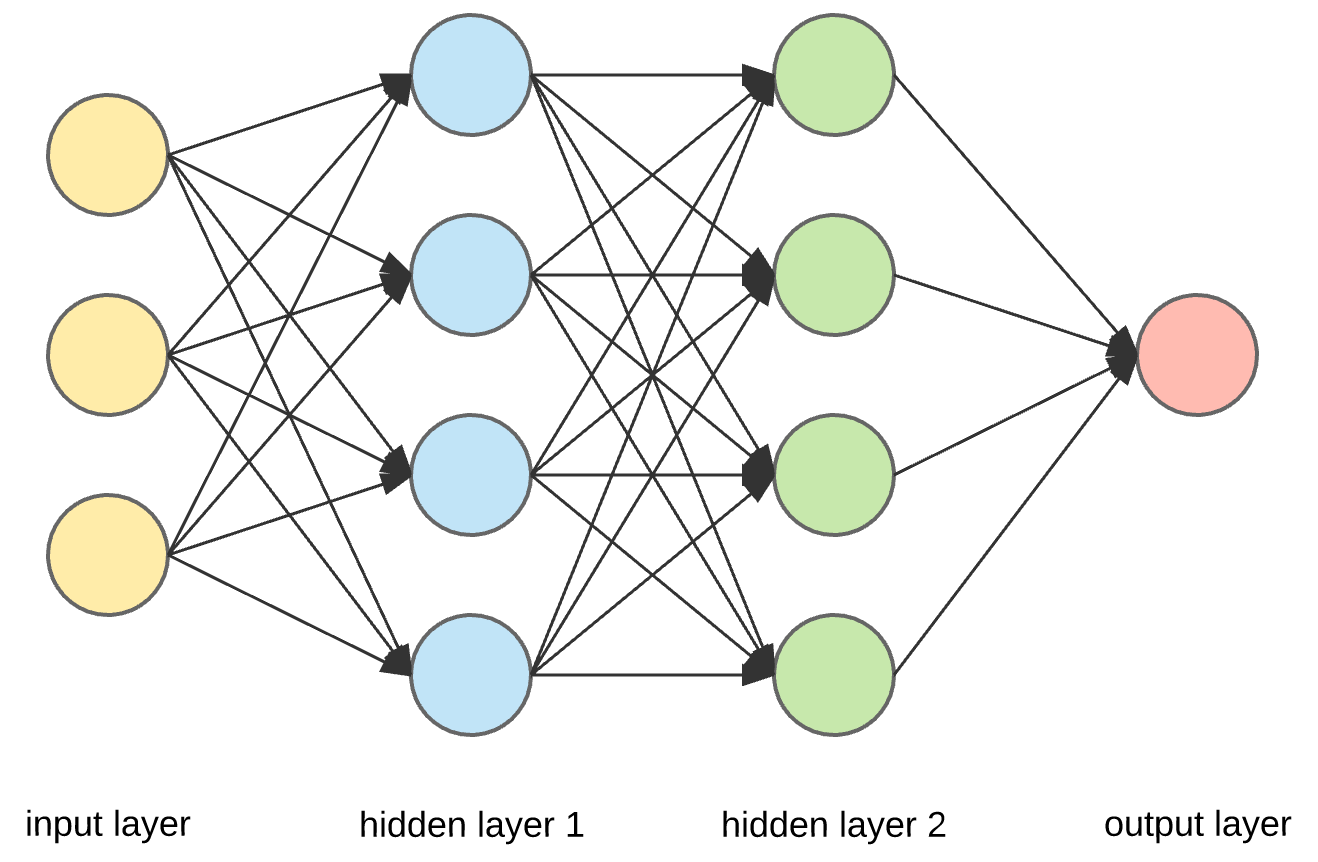

## Here is an example of implementing Neural Network to find out whether the water is Potable(Drinkable) or not

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import ModelCheckpoint

# Loading the Dataset

In [2]:
df= pd.read_csv('water_potability.csv')

In [3]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

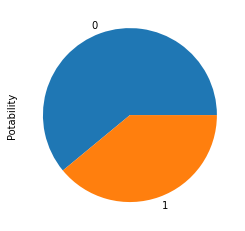

In [6]:
df.Potability.value_counts().plot(kind ='pie');

# Resampling the Data

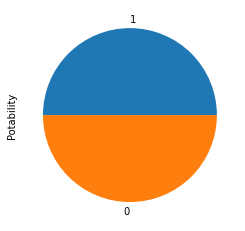

In [7]:
zero  = df[df['Potability']==0]   #zero values in Potability column
one = df[df['Potability']==1]  # one values in Potability column
from sklearn.utils import resample
#minority class that  is 1, we need to upsample/increase that class so that there is no bias
#n_samples = 1998 means we want 1998 sample of class 1, since there are 1998 samples of class 0
df_minority_upsampled = resample(one, replace = True, n_samples = 1998) 
#concatenate
df = pd.concat([zero, df_minority_upsampled])

from sklearn.utils import shuffle
df = shuffle(df) # shuffling so that there is particular sequence

df.Potability.value_counts().plot(kind ='pie');

# Dealing with Null Values

In [8]:
from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy= 'mean')
r= imp.fit_transform(df[['ph']])
s= imp.fit_transform(df[['Sulfate']])
t= imp.fit_transform(df[['Trihalomethanes']])

In [9]:
df['ph']=r
df['Sulfate']= s
df['Trihalomethanes']=t

In [10]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Correlation in Data using Heatmap

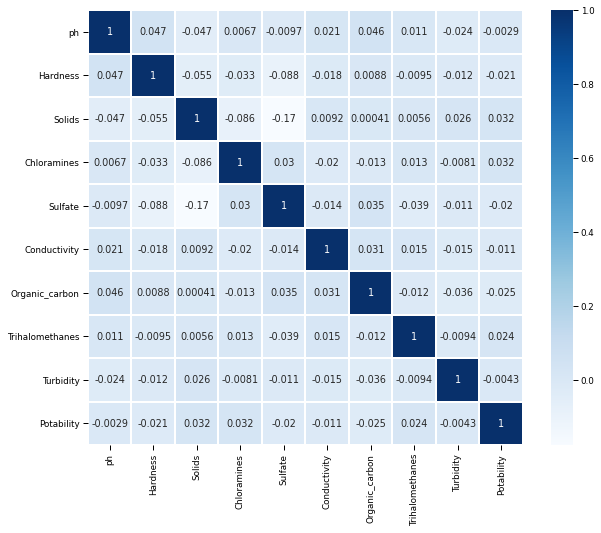

In [11]:
plt.figure(figsize=(10,8))
sns.set_context('paper')
sns.heatmap(df.corr(),cmap='Blues',linecolor='White',linewidth='1',annot=True,square=True);

Data is not correlated with each other as we can see in the Heatmap

# Normalizing the Data

In [12]:
X = df.iloc[:,:9].values
y = df.iloc[:,9:10].values

In [13]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print('Normalized data:')
print(X[0])

Normalized data:
[-0.29666727 -0.24518016 -0.32823735 -0.74899605  0.3238665   0.09955996
  1.90490135 -2.52233608 -0.37897056]


# Splitting the Data

In [63]:
#Train test split of model

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 5)

# Building and Fitting of Model

In [100]:
#importing libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# creating the model

model= keras.Sequential([

    layers.Dense(128, input_shape= (9,), activation= 'relu'),
    layers.Dropout(0.4),
    layers.Dense(64, activation= 'relu'),
    layers.Dropout(0.4),
    layers.Dense(32, activation= 'relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation= 'sigmoid')
])

model.compile(
    optimizer= 'adam',
    loss= 'binary_crossentropy',
    metrics= ['accuracy']
) 
history= model.fit(X_train, y_train, epochs=100,validation_data=(X_test, y_test), verbose= False)

In [101]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 128)               1280      
_________________________________________________________________
dropout_71 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_72 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_93 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_73 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_94 (Dense)             (None, 1)               

In [102]:
model.evaluate(X_train, y_train)

113/113 [==============================] - 0s 800us/step - loss: 0.4298 - accuracy: 0.8251


[0.4298471510410309, 0.8250834345817566]

In [103]:
model.evaluate(X_test, y_test)

13/13 [==============================] - 0s 880us/step - loss: 0.5466 - accuracy: 0.7125


[0.5466487407684326, 0.7124999761581421]

# Plotting Accuracy and Loss

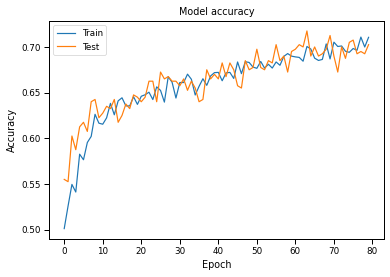

In [46]:
# Model Accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

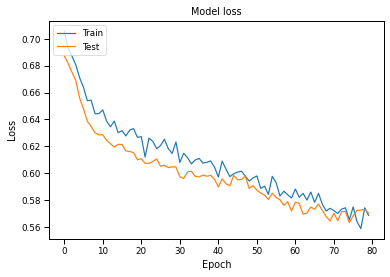

In [47]:
# Model Loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()